# Introduction 

The telecom operator Megaline company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

A preliminary analysis of the plans based on a relatively small client selection is carried out. This analysis uses the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. This project analyze the clients' behavior and determine which prepaid plan brings in more revenue.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
# Load the data files into different DataFrames

df_call=pd.read_csv("megaline_calls.csv")
df_message=pd.read_csv("megaline_messages.csv")
df_internet=pd.read_csv("megaline_internet.csv")
df_user=pd.read_csv("megaline_users.csv")
df_plan=pd.read_csv("megaline_plans.csv")


## Preparing the data

### Data about two telephone plans

In [3]:
# Print the general/summary information about the plans' DataFrame
df_plan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
df_plan.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Data about Users

In [5]:
# Print the general/summary information about the users' DataFrame
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
df_user.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
# change data type
df_user["reg_date"]=pd.to_datetime(df_user["reg_date"])

In [8]:
df_user["churn_date"]=pd.to_datetime(df_user["churn_date"])


In [9]:
# check missing values
df_user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriching Data

Since users who were still using the plan have missing data on churn_date column, so this missing values are replaced with currently_using.
Get date and month for date columns

In [11]:
# get churn_month and reg_month from churn_date and reg_date respectively
df_user["month"]=df_user["reg_date"].dt.month
df_user["churn_month"]=df_user["churn_date"].dt.month

### Data about Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
df_call.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Call_date column is in object dtype, so change them to date type

In [14]:
# change call_date date type to date type
df_call["call_date"]=pd.to_datetime(df_call["call_date"])

### Enriching Call data

In [15]:
# getting month 
df_call["month"]=df_call["call_date"].dt.month

In [19]:
# round up duration to minutes
def round_up(duration):
    seconds=duration*60
    if seconds%60==0:
        return duration
    return np.ceil(duration)

### Data about messages

In [20]:
# Print the general/summary information about the messages' DataFrame
df_message.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
# Print a sample of data for messages
df_message.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


message_date is given in object type, so change it to date type

In [22]:
# change the given column to date type
df_message["message_date"]=pd.to_datetime(df_message["message_date"])

### Enriching  Messages data

In [23]:
# get month of message_date
df_message["month"]=df_message["message_date"].dt.month

### Data about Internet 

In [24]:
# Print the general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Print a sample of data for the internet traffic
df_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 session_date is given as object type, so change it to date data type.

In [26]:
# change the given column to datetime type
df_internet["session_date"]=pd.to_datetime(df_internet["session_date"])

### Enriching Messages data

In [27]:
# Get session month from session date
df_internet["month"]=df_internet["session_date"].dt.month

## Study plan conditions

In [28]:
# Print out the plan conditions and make sure they are clear for you
df_plan.head(5)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


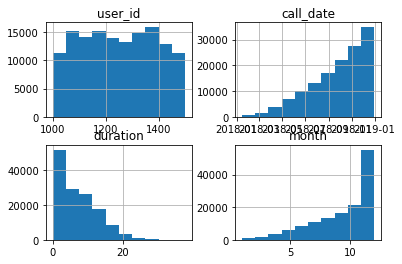

In [30]:
# check data
df_call.hist()
plt.show()

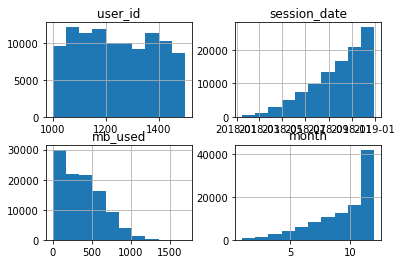

In [31]:
# check internet data
df_internet.hist()
plt.show()

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [29]:
# Calculate the number of calls made by each user per month. Save the result.
df_call.head(5)
call_per_user_month=pd.pivot_table(df_call, index=["user_id","month"],values=["id"],aggfunc="count")

In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.

call_per_user_month=df_call.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

In [33]:
# change columns name 
call_per_user_month.rename(columns={"count":"call_count","sum":"total_duration"},inplace=True)

In [34]:
call_per_user_month.columns

Index(['user_id', 'month', 'call_count', 'total_duration'], dtype='object')

In [35]:
# creating avg_call_duration of each user
call_per_user_month["avg_call_duration"]=round(call_per_user_month["total_duration"]/call_per_user_month["call_count"],2)

In [107]:
call_per_user_month.head(10)

id
user_id month     
1000    12      16
1001    8       27
        9       49
        10      65
        11      64
        12      56
1002    10      11
        11      55
        12      47
1003    12     149

In [108]:
df_call.columns

Index(['id', 'user_id', 'call_date', 'duration', 'month'], dtype='object')

In [109]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minute_by_user_month=pd.pivot_table(df_call,index=["user_id","month"],values="duration",aggfunc="sum")
minute_by_user_month


duration
user_id month          
1000    12       116.83
1001    8        171.14
        9        297.69
        10       374.11
        11       404.59
...                 ...
1498    12       324.77
1499    9        330.37
        10       363.28
        11       288.56
        12       468.10

[2258 rows x 1 columns]

In [110]:
# Calculate the number of messages sent by each user per month. Save the result.
message_by_user_month=pd.pivot_table(df_message,index=["user_id","month"],values="id",aggfunc="count")
message_by_user_month.head(5)

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [111]:
df_internet.head(5)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [112]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
mb_each_user_month=pd.pivot_table(df_internet,index=["user_id","month"],values="mb_used",aggfunc="sum")
mb_each_user_month.head(5)

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [113]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_com=call_per_user_month.merge(minute_by_user_month,on=["user_id","month"]).merge(message_by_user_month,on=["user_id","month"]).merge(mb_each_user_month,on=["user_id","month"])
df_com.head(5)

id_x  duration  id_y   mb_used
user_id month                                
1000    12       16    116.83    11   1901.47
1001    8        27    171.14    30   6919.15
        9        49    297.69    44  13314.82
        10       65    374.11    53  22330.49
        11       64    404.59    36  18504.30

In [114]:
# renaming column names
df_com.rename(columns={"id_x":"total_calls","id_y":"messages_user_month"},inplace=True)

In [115]:
# Add the plan information
df_all=df_com.merge(df_user,how="outer",on="user_id")
df_all.head(5)

,user_id,total_calls,duration,messages_user_month,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,month,churn_month
0,1000,16.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,27.0,171.14,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1001,49.0,297.69,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
3,1001,65.0,374.11,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
4,1001,64.0,404.59,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN


In [116]:
# change column name "plan" to "plan_name"
df_all.rename(columns={"plan":"plan_name"},inplace=True)

In [117]:
# merge combined df with plan 
df_all=df_all.merge(df_plan,how="outer",on="plan_name")

In [118]:
df_all.columns

Index(['user_id', 'total_calls', 'duration', 'messages_user_month', 'mb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name',
       'churn_date', 'month', 'churn_month', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute'],
      dtype='object')

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [119]:
# Calculate the monthly revenue for each user
def cal_revenue(row):
    """
    Calculate the revenue for each plan
    """
    (
        duration,
        messages_user_month,
        mb_used,
        messages_included,
        mb_per_month_included,
        minutes_included,
        usd_monthly_pay,
        usd_per_gb,
        usd_per_message,
        usd_per_minute
    ) = row
    additional_call_cost, additional_session_cost, additional_msg_cost = 0, 0, 0
    if duration > minutes_included:
        additional_call_cost = (duration - minutes_included) * usd_per_minute
    if mb_used > mb_per_month_included:
        additional_session_cost = ((mb_used - mb_per_month_included) / 1024) * usd_per_gb
    if messages_user_month > messages_included:
        additional_msg_cost = (messages_user_month - messages_included) * usd_per_message
    return usd_monthly_pay + additional_call_cost + additional_session_cost + additional_msg_cost

In [120]:
columns_to_use = ['duration', 'messages_user_month', 'mb_used',
                'messages_included', 'mb_per_month_included', 'minutes_included',
                'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_all['cal_revenue'] = df_all[columns_to_use].apply(cal_revenue, axis=1)

In [121]:
df_all.head(5)

,user_id,total_calls,duration,messages_user_month,mb_used,first_name,last_name,age,city,reg_date,...,month,churn_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,cal_revenue
0,1000,16.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,12,NaN,1000,30720,3000,70,7,0.01,0.01,70.000000
1,1006,2.0,9.32,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,11,12.0,1000,30720,3000,70,7,0.01,0.01,70.000000
2,1006,9.0,54.79,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,11,12.0,1000,30720,3000,70,7,0.01,0.01,79.562246
3,1008,71.0,450.21,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,8,NaN,1000,30720,3000,70,7,0.01,0.01,70.000000
4,1008,63.0,422.81,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,8,NaN,1000,30720,3000,70,7,0.01,0.01,70.000000


In [122]:
 # creating age group function
def age_groups(age):
    if age < 30:
        return '18-29 years'
    if age < 40:
        return '30-39 years'
    if age < 50:
        return '40-49 years'
    if age < 60:
        return '50-59 years'
    return '60+ years'

In [123]:
# creating age_group column
df_all["age_groups"]=df_all["age"].apply(age_groups)

In [124]:
df_all["age_groups"].value_counts(normalize=True)

60+ years      0.274384
18-29 years    0.232583
30-39 years    0.173098
40-49 years    0.163451
50-59 years    0.156484
Name: age_groups, dtype: float64

60 plus group are top age group

In [125]:
# df of each plan
df_surf=df_all.query('plan_name=="surf"')
df_ultimate=df_all.query('plan_name=="ultimate"')

In [126]:
# age group in surf plan
df_surf["age_groups"].value_counts(normalize=True)

60+ years      0.266508
18-29 years    0.260143
40-49 years    0.166269
30-39 years    0.165473
50-59 years    0.141607
Name: age_groups, dtype: float64

In [127]:
# age_group in ultimate plan
df_ultimate["age_groups"].value_counts(normalize=True)

60+ years      0.290640
30-39 years    0.188834
50-59 years    0.187192
18-29 years    0.175698
40-49 years    0.157635
Name: age_groups, dtype: float64

On both plans 60 plus age group have the top age group.
Age group of Surf plan is similar to the overall dataset.

In [128]:
df_all.columns

Index(['user_id', 'total_calls', 'duration', 'messages_user_month', 'mb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name',
       'churn_date', 'month', 'churn_month', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'cal_revenue',
       'age_groups'],
      dtype='object')

In [129]:
print('Average duration of each user in Surf plan is {:.2f} minutes'.format(df_surf["duration"].mean()))
print('Average duration of each user in Ultimate plan is {:.2f} minutes '.format(df_ultimate["duration"].mean()))

Average duration of each user in Surf plan is 420.78 minutes
Average duration of each user in Ultimate plan is 417.56 minutes 


In [130]:
print('Average messages of each user in Surf plan is {:.2f} messages'.format(df_surf["messages_user_month"].mean()))
print('Average messages of each user in Ultimate plan is {:.2f} messages'.format(df_ultimate["messages_user_month"].mean()))

Average messages of each user in Surf plan is 39.49 messages
Average messages of each user in Ultimate plan is 46.46 messages


In [131]:
print('Average mb used of each user in Surf plan is {:.2f} mb'.format(df_surf["mb_used"].mean()))
print('Average mb used of each user in Ultimate plan is {:.2f} mb'.format(df_ultimate["mb_used"].mean()))

Average mb used of each user in Surf plan is 16629.02 mb
Average mb used of each user in Ultimate plan is 17251.00 mb


In [132]:
print('Average revenue of each user in Surf plan is $ {:.2f}'.format(df_surf["cal_revenue"].mean()))
print('Average revenue of each user in Ultimate plan is  ${:.2f}'.format(df_ultimate["cal_revenue"].mean()))

Average revenue of each user in Surf plan is $ 54.62
Average revenue of each user in Ultimate plan is  $71.96


In [133]:
# splitting city column 
new=df_all["city"].str.split(",", n = 2, expand = True)

In [134]:
# city_new column is created that contains only city name 
df_all["city_new"]=new[0]

In [135]:
# df of New York and New Jersy area
df_all_NY_NJ = df_all.query('city_new=="New York-Newark-Jersey City"')

In [136]:
# df of areas other than New York and New Jersy
df_all_Other_Areas = df_all.query('city_new!="New York-Newark-Jersey City"')

In [137]:
df_all_Other_Areas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1865
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                1571 non-null   int64         
 1   total_calls            1480 non-null   float64       
 2   duration               1480 non-null   float64       
 3   messages_user_month    1480 non-null   float64       
 4   mb_used                1480 non-null   float64       
 5   first_name             1571 non-null   object        
 6   last_name              1571 non-null   object        
 7   age                    1571 non-null   int64         
 8   city                   1571 non-null   object        
 9   reg_date               1571 non-null   datetime64[ns]
 10  plan_name              1571 non-null   object        
 11  churn_date             114 non-null    datetime64[ns]
 12  month                  1571 non-null   int64         
 13  chu

In [138]:
# Revenue of Other areas
df_all_other_area_revenue=df_all_Other_Areas["cal_revenue"]

In [139]:
df_all_NY_NJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 29 to 1864
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                295 non-null    int64         
 1   total_calls            279 non-null    float64       
 2   duration               279 non-null    float64       
 3   messages_user_month    279 non-null    float64       
 4   mb_used                279 non-null    float64       
 5   first_name             295 non-null    object        
 6   last_name              295 non-null    object        
 7   age                    295 non-null    int64         
 8   city                   295 non-null    object        
 9   reg_date               295 non-null    datetime64[ns]
 10  plan_name              295 non-null    object        
 11  churn_date             13 non-null     datetime64[ns]
 12  month                  295 non-null    int64         
 13  chu

In [140]:
# revenue of NY NJ
df_all_NY_NJ_revenue=df_all_NY_NJ["cal_revenue"]

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [58]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.


In [59]:
# average duration for each month
avg_duration_surf=df_surf.groupby("month")["duration"].mean()
avg_duration_ultimate=df_ultimate.groupby("month")["duration"].mean()

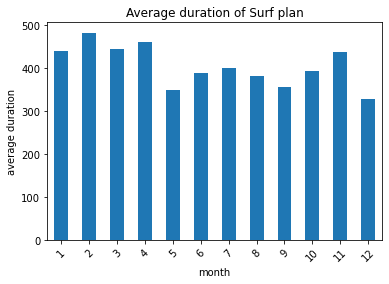

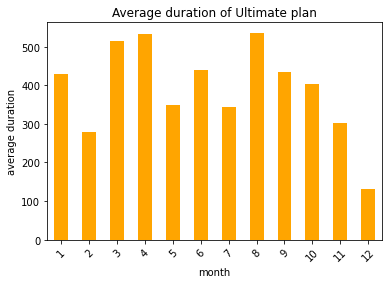

In [60]:
# plot bar plot for each plan df
avg_duration_surf.plot.bar(rot=45)
plt.title("Average duration of Surf plan")
plt.ylabel("average duration")
plt.show()
avg_duration_ultimate.plot.bar(rot=45,color="orange")
plt.title("Average duration of Ultimate plan")
plt.ylabel("average duration")
plt.show()

In [61]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# getting total minutes for each month
total_minutes_surf=df_surf.groupby("month")["duration"].sum()
total_minutes_ultimate=df_ultimate.groupby("month")["duration"].sum()

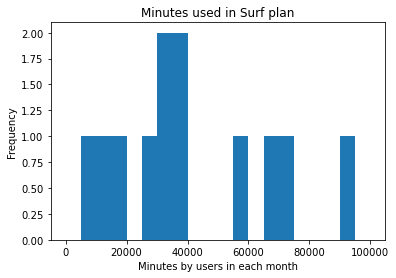

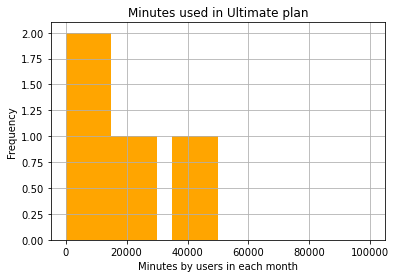

In [62]:
# histogram plot for each plan
total_minutes_surf.plot.hist(bins=20,range=(0,100000))
plt.title("Minutes used in Surf plan")
plt.xlabel("Minutes by users in each month")
plt.show()
total_minutes_ultimate.hist(bins=20,range=(0,100000),color="orange")
plt.title("Minutes used in Ultimate plan")
plt.xlabel("Minutes by users in each month")
plt.ylabel("Frequency")
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [63]:
# Calculate the mean and the variance of the monthly call duration
avg_monthly_duration_surf=df_surf.groupby("month")["duration"].mean()
avg_monthly_duration_ultimate=df_ultimate.groupby("month")["duration"].mean()

In [64]:
# variance of the monthly call duration 
variance_monthly_duration_surf=df_surf.groupby("month")["duration"].var()
variance_monthly_duration_ultimate=df_ultimate.groupby("month")["duration"].var()

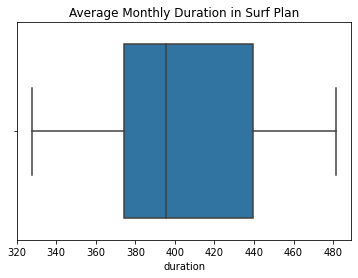

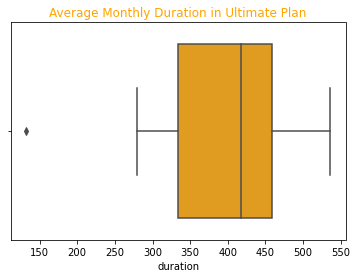

In [65]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x=avg_monthly_duration_surf)
plt.title("Average Monthly Duration in Surf Plan")
plt.show()
sns.boxplot(x=avg_monthly_duration_ultimate,color="orange")
plt.title("Average Monthly Duration in Ultimate Plan",color="orange")
plt.show()

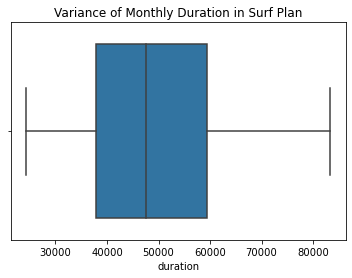

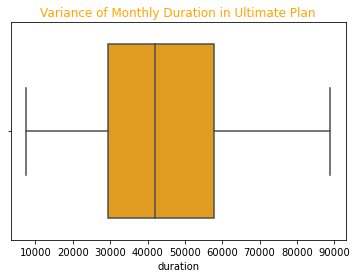

In [66]:
sns.boxplot(x=variance_monthly_duration_surf)
plt.title("Variance of Monthly Duration in Surf Plan")
plt.show()
sns.boxplot(x=variance_monthly_duration_ultimate,color="orange")
plt.title("Variance of Monthly Duration in Ultimate Plan",color="orange")
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

It shows that in average Ultimate plan users have longer call duration than Surf plan users.

### Messages

In [67]:
# Compare the number of messages users of each plan tend to send each month
# messages in each plan in each month
avg_messages_month_surf=df_surf.groupby("month")["messages_user_month"].sum()
avg_messages_month_ultimate= df_ultimate.groupby("month")["messages_user_month"].sum()

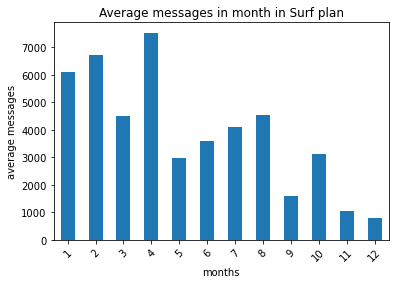

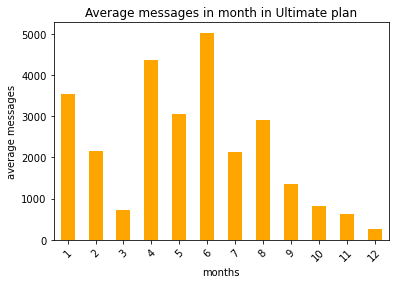

In [68]:
avg_messages_month_surf.plot.bar(rot=45)
plt.title("Average messages in month in Surf plan")
plt.ylabel("average messages")
plt.xlabel("months")
plt.show()
avg_messages_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("Average messages in month in Ultimate plan")
plt.ylabel("average messages")
plt.xlabel("months")
plt.show()

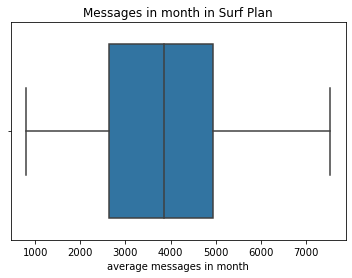

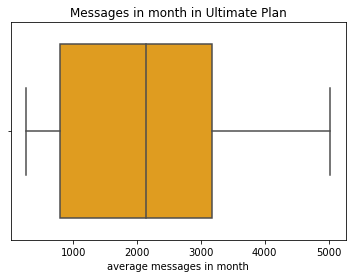

In [69]:
# boxplot of messages in each plan in each month
sns.boxplot(x=avg_messages_month_surf)
plt.title("Messages in month in Surf Plan")
plt.xlabel("average messages in month")
plt.show()
sns.boxplot(x=avg_messages_month_ultimate,color="orange")
plt.title("Messages in month in Ultimate Plan")
plt.xlabel("average messages in month")
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Median average number of messages in each month of Surf plan is higher than that of Ultimate plan.

### Internet

In [70]:
# Compare the amount of internet traffic consumed by users per plan

In [71]:
# df of each plan that have mb used in each month
total_mb_month_surf = df_surf.groupby("month")["mb_used"].sum()
total_mb_month_ultimate = df_ultimate.groupby("month")["mb_used"].sum()

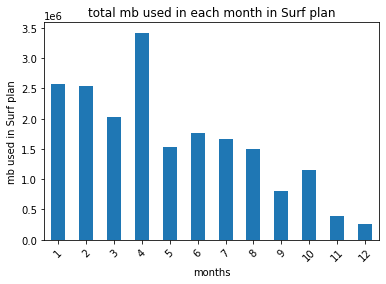

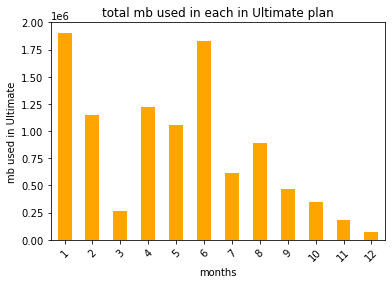

In [72]:
total_mb_month_surf.plot.bar(rot=45)
plt.title("total mb used in each month in Surf plan")
plt.ylabel("mb used in Surf plan")
plt.xlabel("months")
plt.show()
total_mb_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("total mb used in each in Ultimate plan")
plt.ylabel("mb used in Ultimate")
plt.xlabel("months")
plt.show()

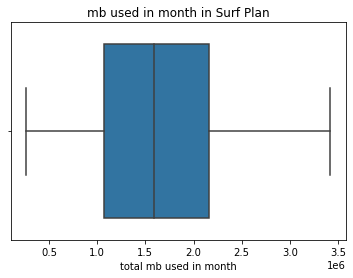

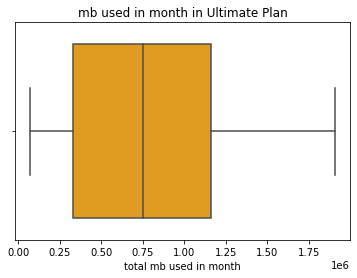

In [73]:
sns.boxplot(x=total_mb_month_surf)
plt.title("mb used in month in Surf Plan")
plt.xlabel("total mb used in month")
plt.show()
sns.boxplot(x=total_mb_month_ultimate,color="orange")
plt.title("mb used in month in Ultimate Plan")
plt.xlabel("total mb used in month")
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

Median mb used in each month in Surf plan is higher than in Ultimate plan.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [74]:
# df of revenue in each month in each plan
total_revenue_month_surf = df_surf.groupby("month")["cal_revenue"].sum()
total_revenue_month_ultimate = df_ultimate.groupby("month")["cal_revenue"].sum()

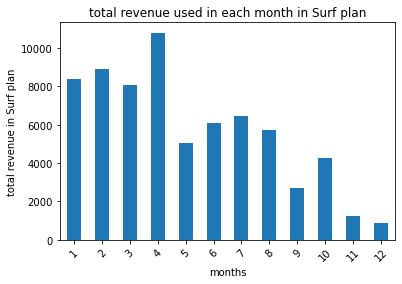

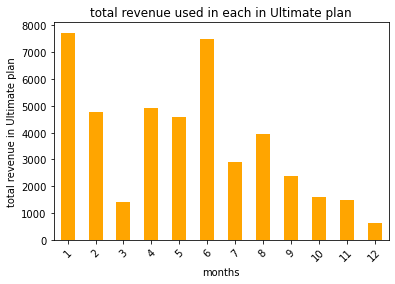

In [75]:
# bar plot of total revenue in each plan
total_revenue_month_surf.plot.bar(rot=45)
plt.title("total revenue used in each month in Surf plan")
plt.ylabel("total revenue in Surf plan")
plt.xlabel("months")
plt.show()
total_revenue_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("total revenue used in each in Ultimate plan")
plt.ylabel("total revenue in Ultimate plan")
plt.xlabel("months")
plt.show()

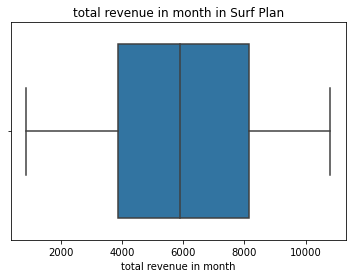

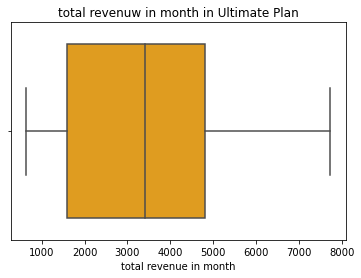

In [76]:
sns.boxplot(x=total_revenue_month_surf)
plt.title("total revenue in month in Surf Plan")
plt.xlabel("total revenue in month")
plt.show()
sns.boxplot(x=total_revenue_month_ultimate,color="orange")
plt.title("total revenuw in month in Ultimate Plan")
plt.xlabel("total revenue in month")
plt.show()

Total revenue in Surf plan have higher median than in ultimate plan.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

The null hypothesis is mean revenue in each month in Surf plan is equal to mean revenue of Ultimate plan.

In [77]:

# Test the hypotheses
mean_revenue_surf = total_revenue_month_surf
mean_revenue_ultimate = total_revenue_month_ultimate

alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(mean_revenue_surf, mean_revenue_ultimate)
# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) # your code: print the p-value you get

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.07791231297731202
We can't reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

### General Conclusion

1. Age_group

On both plans 60 plus age group have the top age group.

Age group composition percentage of Surf plan is closely related to  the overall dataset.


2. Call duration

Average duration of each user in Surf plan is 420.78 minutes

Average duration of each user in Ultimate plan is 417.56 minutes 


3. Number of messages

Average messages of each user in Surf plan is 39.49 messages

Average messages of each user in Ultimate plan is 46.46 messages


4. mb used

Average mb used of each user in Surf plan is 16629.02 mb

Average mb used of each user in Ultimate plan is 17251.00 mb


5. Revenue

Average Revenue of each user  in Surf plan is $ 54.62

Average Revenue of each user in Ultimate plan is  $71.96



Since it is less expenxive to use Surf plan for getting similar service like Ultimate plan, it is better to use Surf plan.

Null hypothesis: average revenuein NY-NJ area is equal to Other areas

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [142]:
# Test the hypotheses

alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(df_all_NY_NJ_revenue, df_all_other_area_revenue)
# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) # your code: print the p-value you get

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.004318154793730765
We reject the null hypothesis


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

1. Age_group

On both plans 60 plus age group have the top age group.

Age group composition percentage of Surf plan is closely related to  the overall dataset.


2. Call duration

Average duration of each user in Surf plan is 420.78 minutes

Average duration of each user in Ultimate plan is 417.56 minutes 


3. Number of messages

Average messages of each user in Surf plan is 39.49 messages

Average messages of each user in Ultimate plan is 46.46 messages


4. mb used

Average mb used of each user in Surf plan is 16629.02 mb

Average mb used of each user in Ultimate plan is 17251.00 mb


5. Revenue

Average Revenue of each user  in Surf plan is $ 54.62

Average Revenue of each user in Ultimate plan is  $71.96



Since it is less expenxive to use Surf plan for getting similar service like Ultimate plan, it is better to use Surf plan.